# Predicting Hotel Cancellations

## 🏨 Background


You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

The project will focus on answering two main questions:

1. What factors affect whether customers cancel their booking?

2. Are cancellations more likely during weekends?

The analysis will proceed the following steps:

1. Identify relevant data for analysis;
2. Check how the cancel rate is distributed, and get which factors have higher influence in the cancel rate;
3. Check if the cancelations are more likely during the weekends;
4. Conclusion with advices based on what the data reveals about the cancelled bookings.

# 1. Loading and exploring the data:

## 1.1 Loading and first view of the data

In [84]:
# Loading packages:

suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(ggplot2))



# Loading the data

ht <- readr::read_csv('data/hotel_bookings.csv', show_col_types = FALSE)
head(ht)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


## 1.2 Checking the data:

In a first look, we can notice that the variable "Booking_ID" doesn't affect the analysis at all, therefore, it will be removed for our dataset.

In [85]:
# Removing the Booking ID: 

ht <- ht[, -1]

# Visualizing the result:

head(ht)
dim(ht)

no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not_Canceled
2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


[1] 36275    18

We'll proceed to identify the frequency of the variables in our dataset:

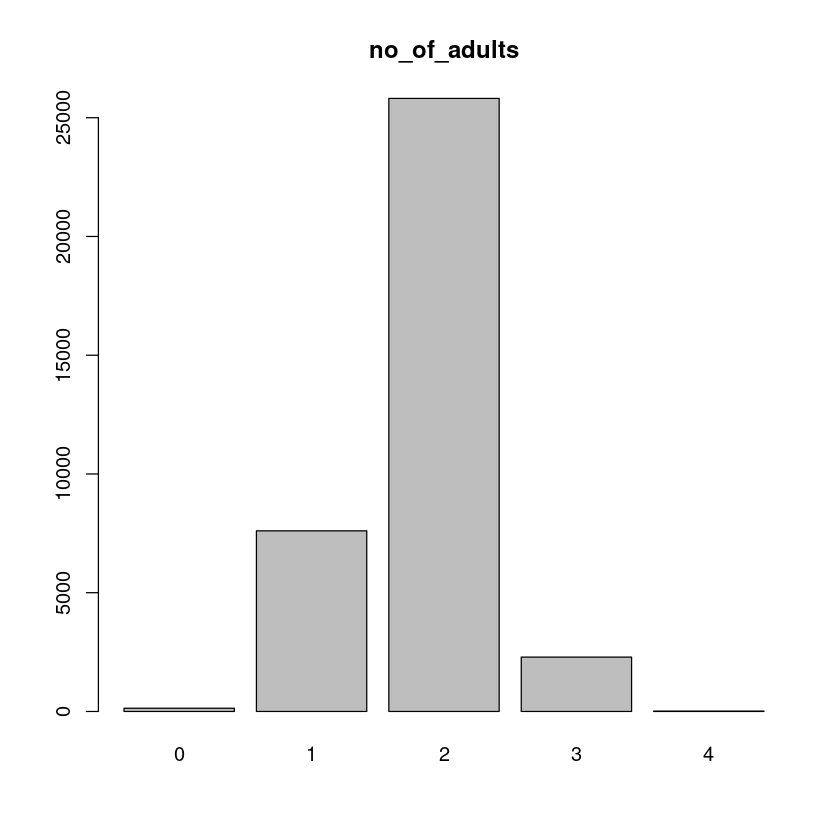

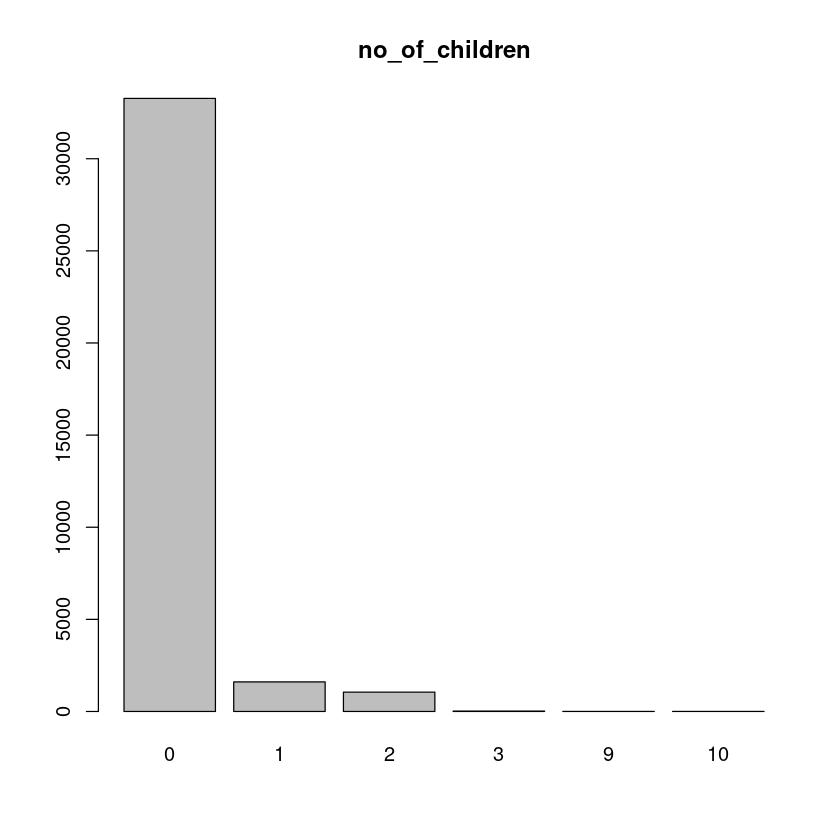

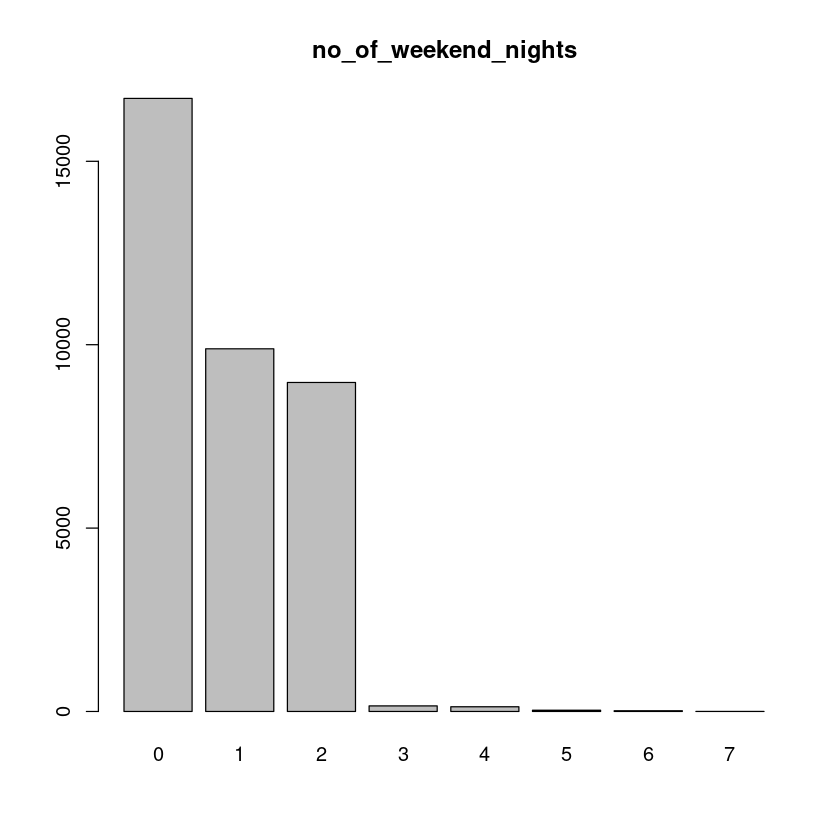

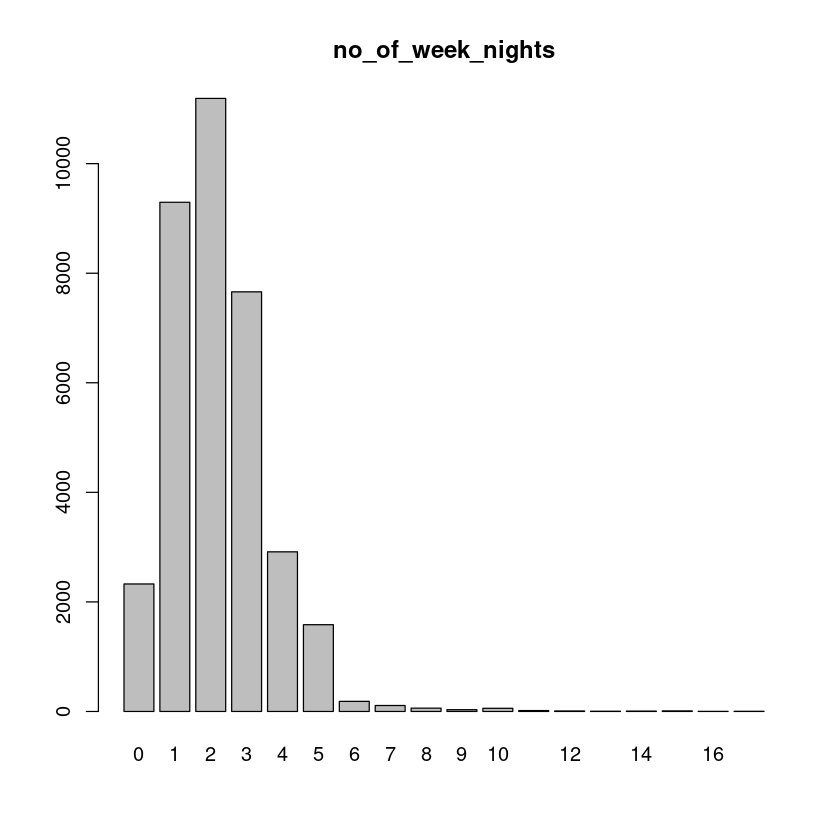

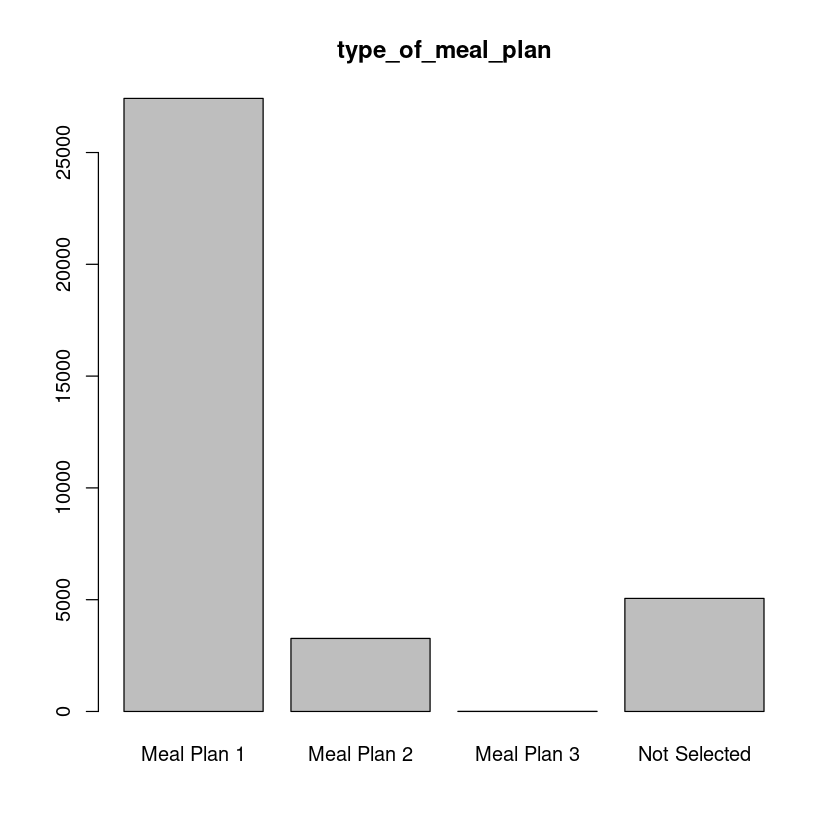

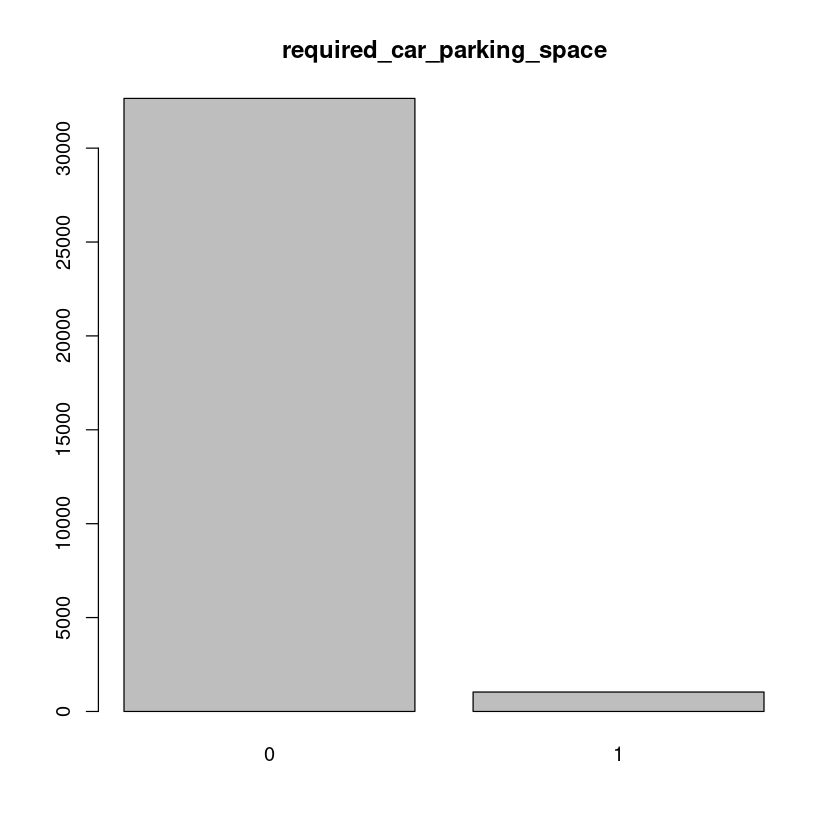

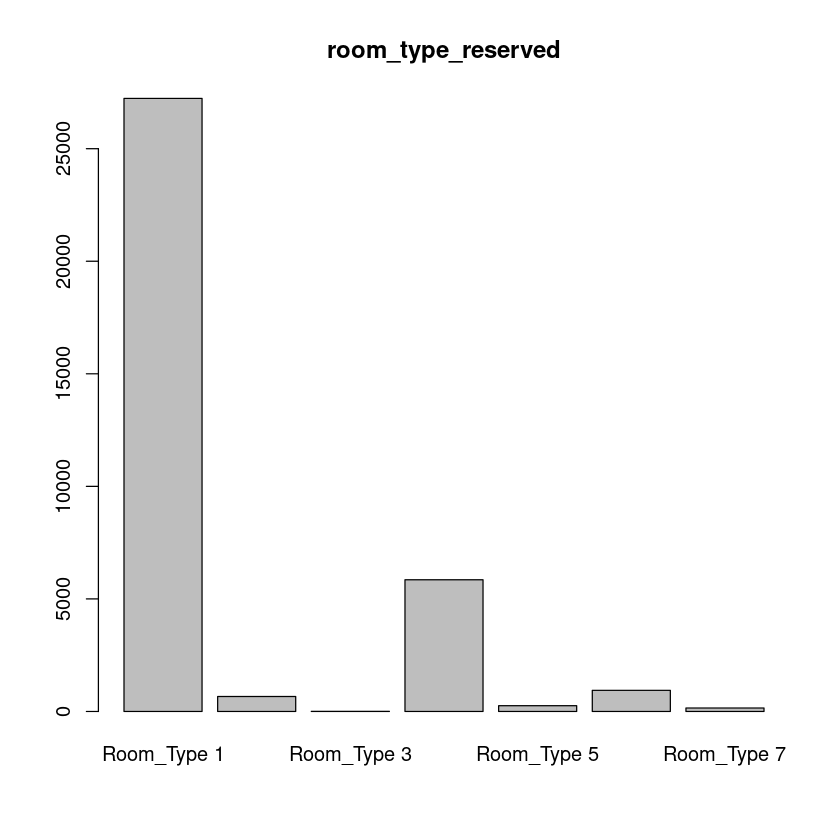

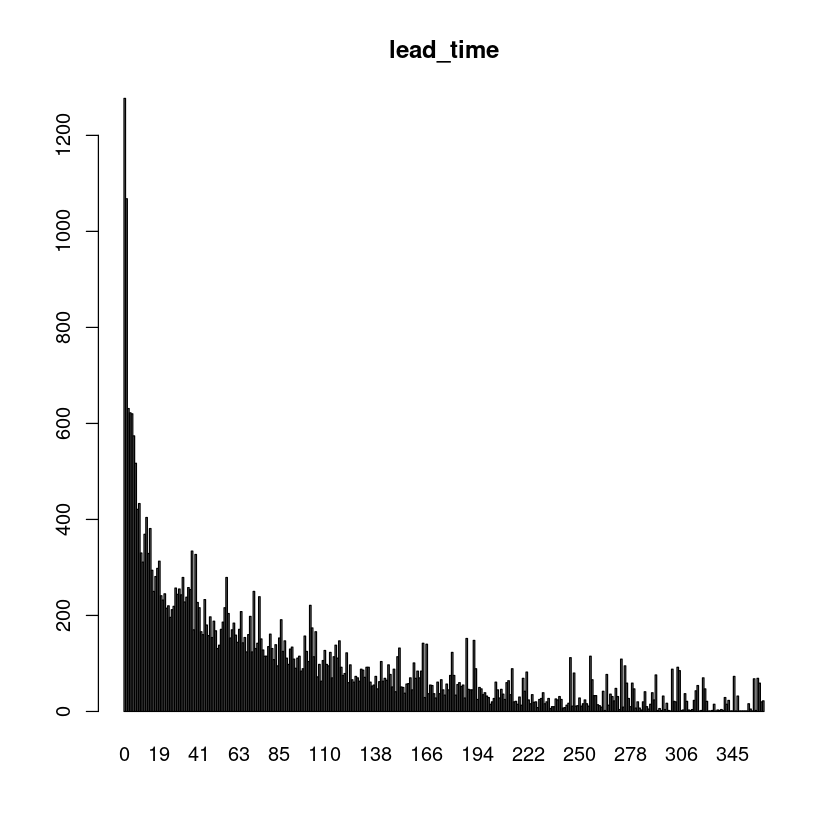

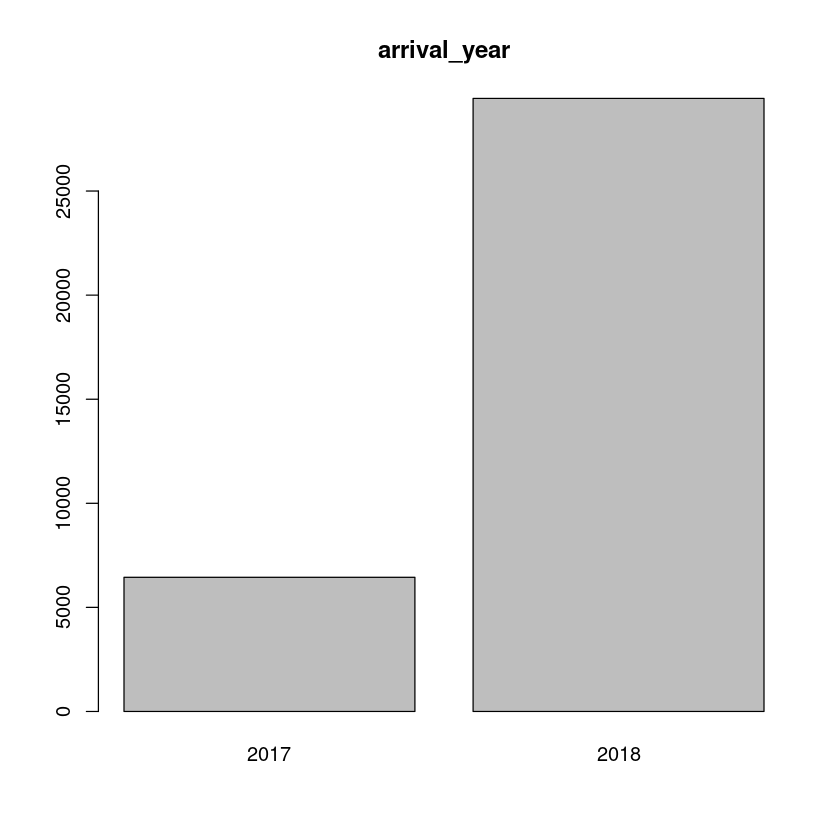

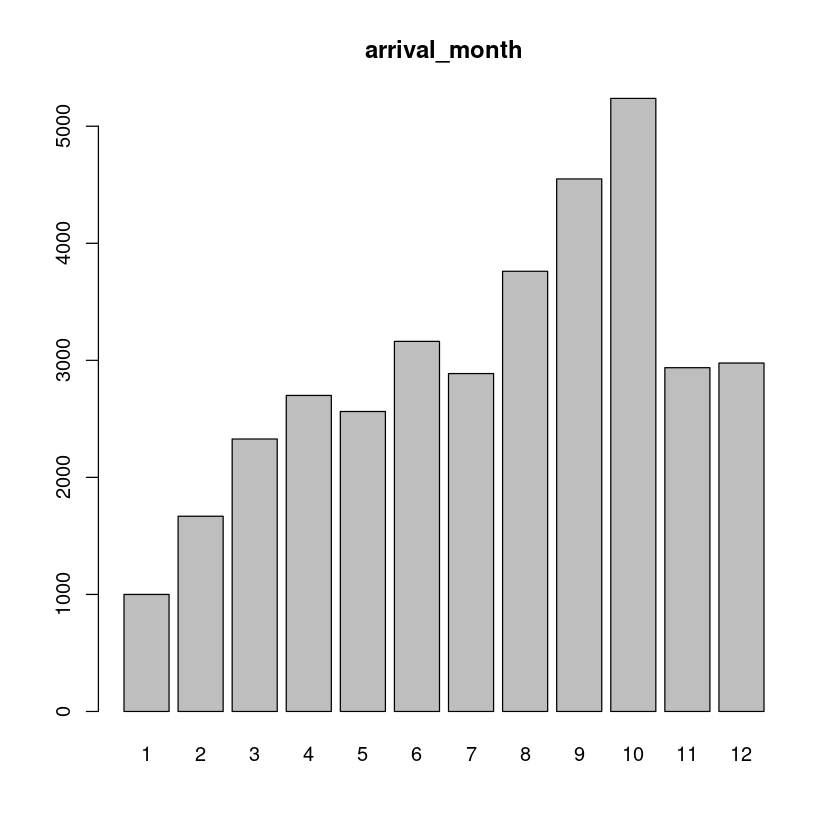

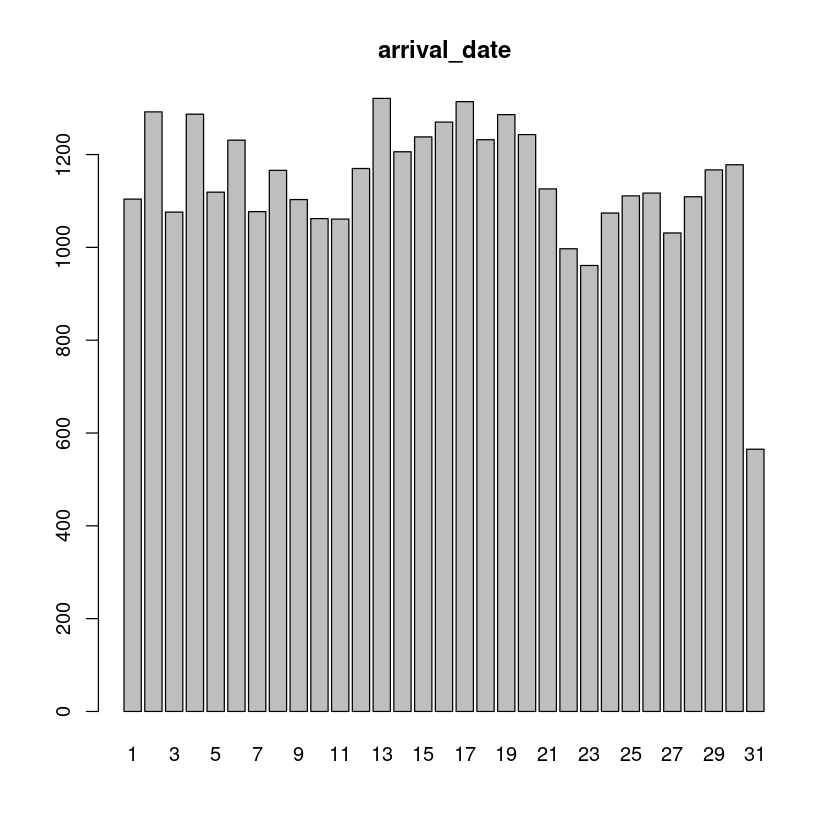

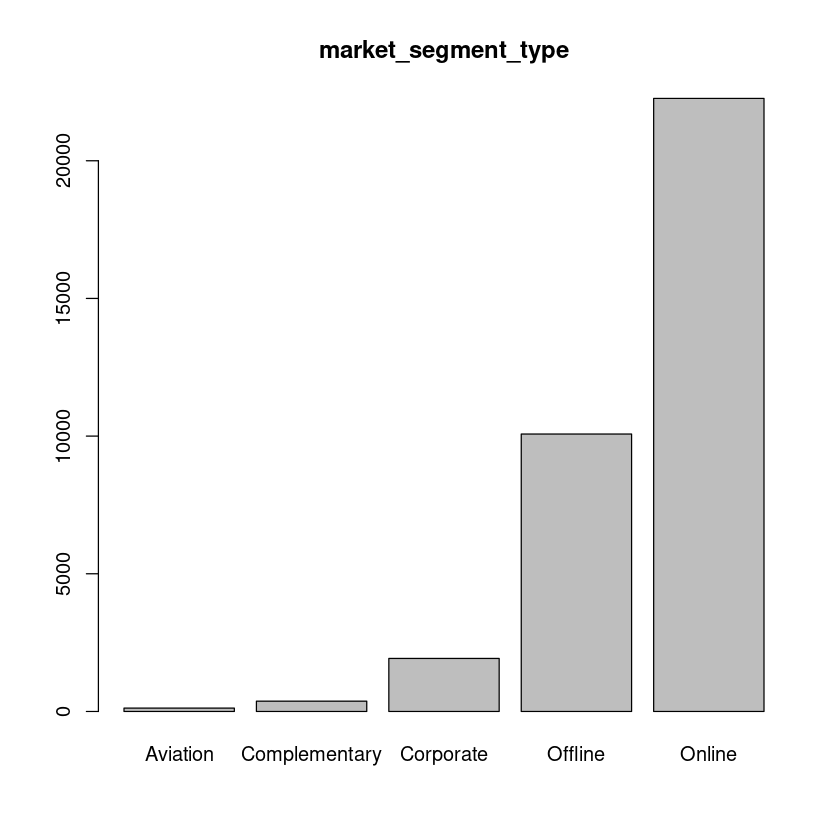

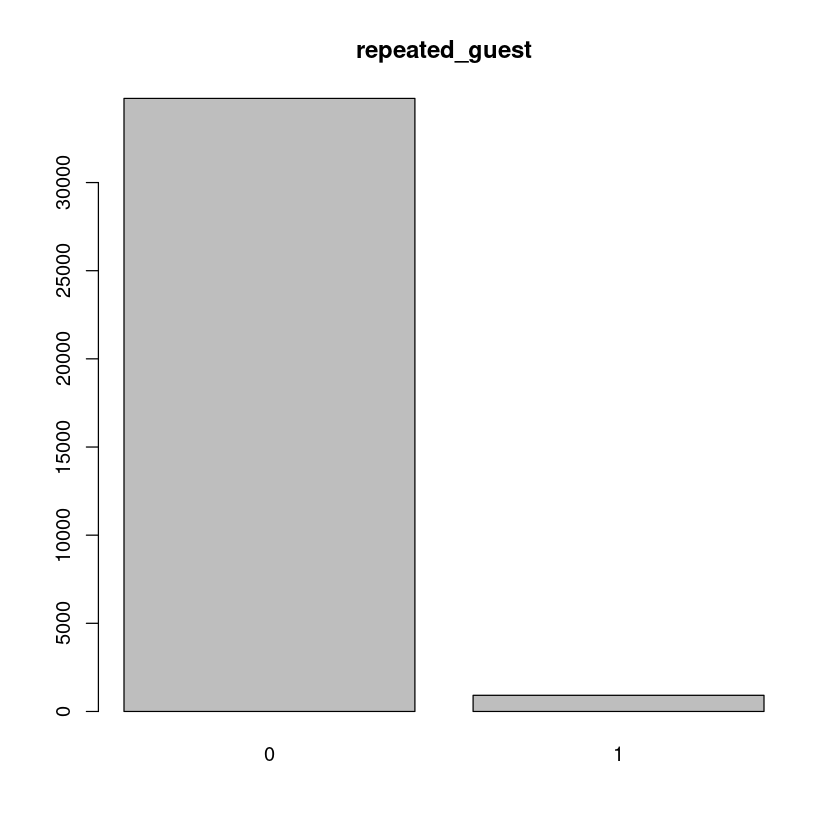

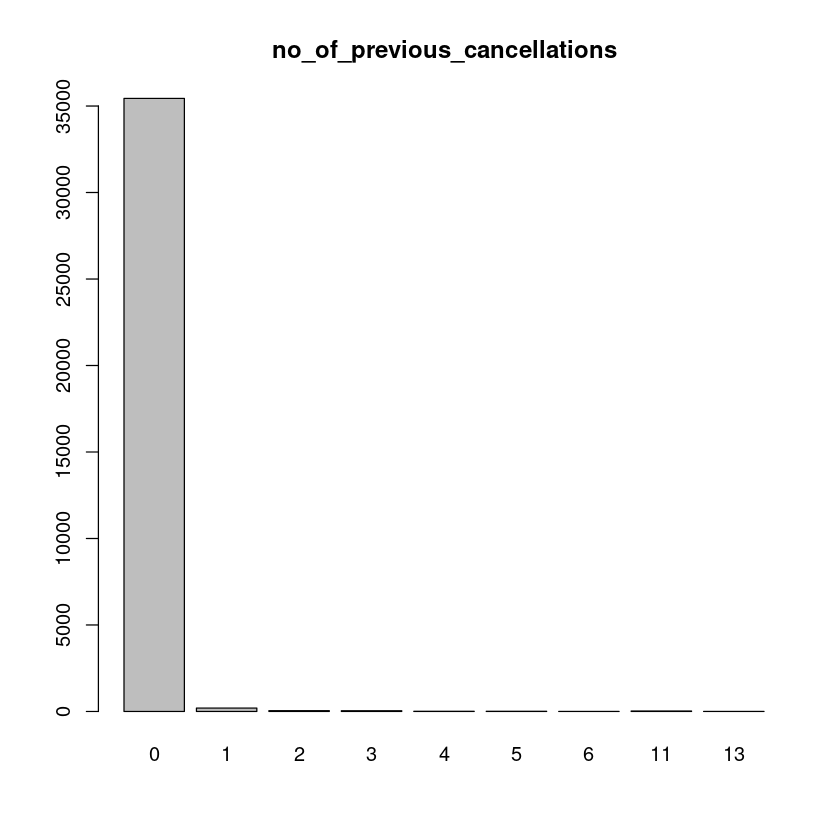

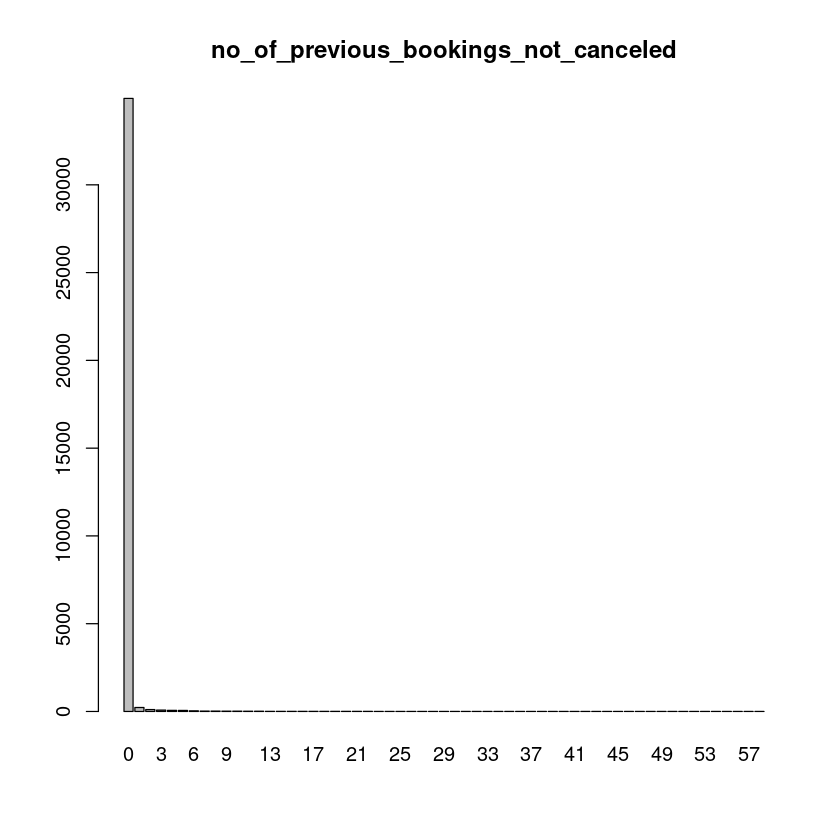

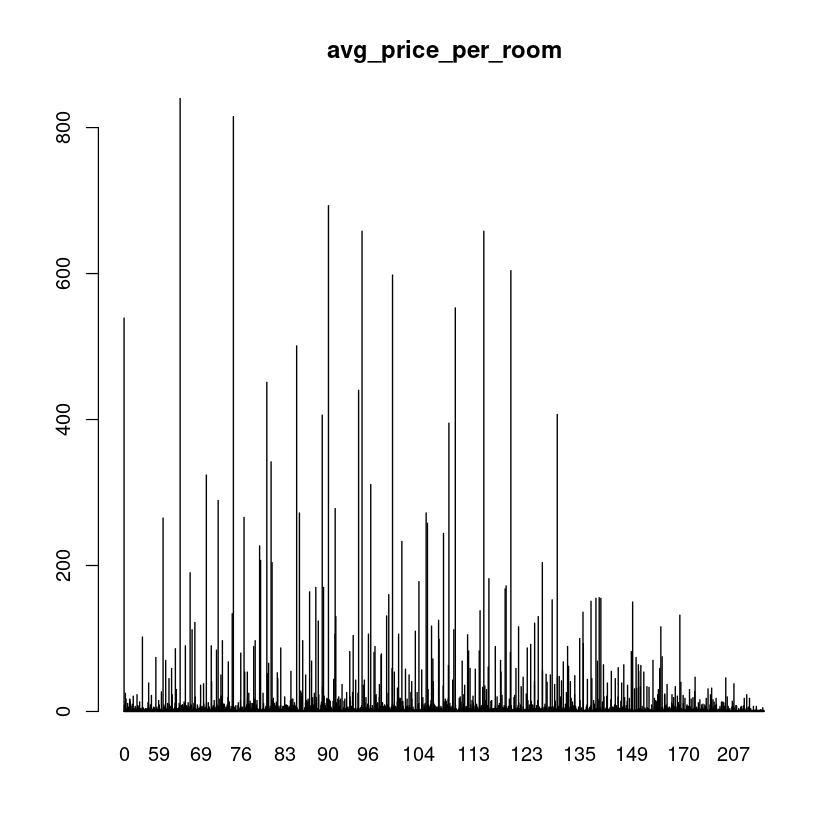

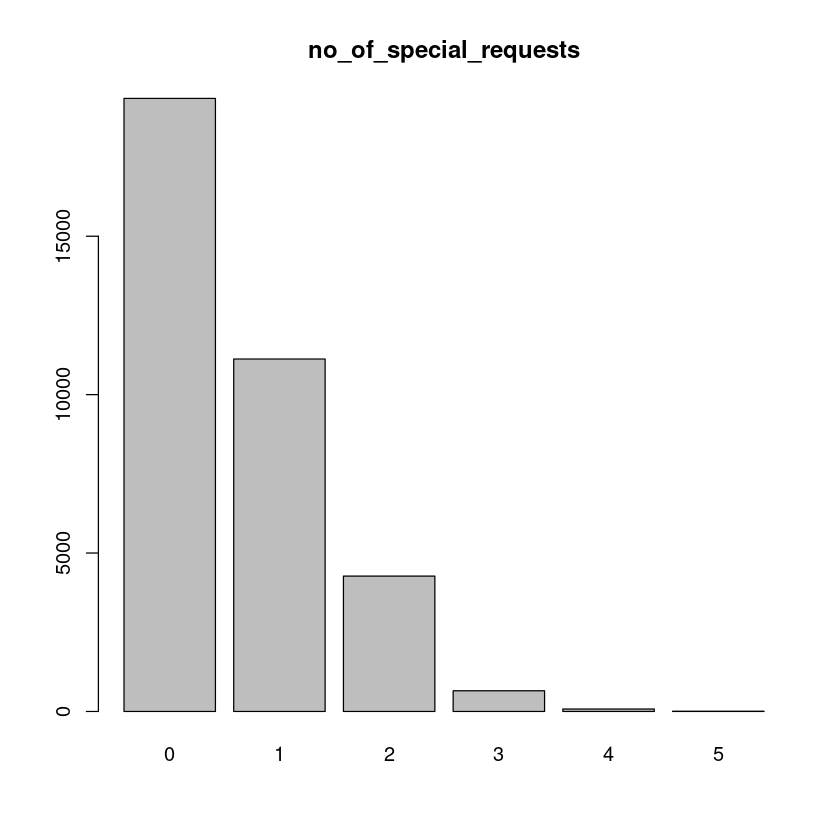

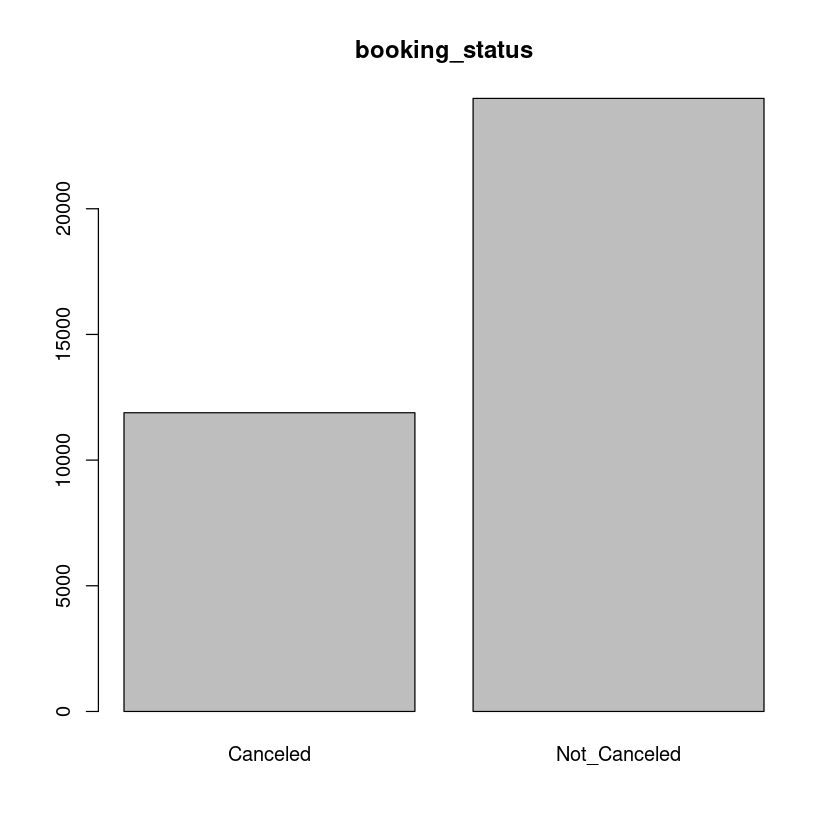

In [86]:
# Checking the frequency of values per column:

for (col in names(ht)) {
  freq <- table(ht[[col]])
  barplot(freq, main=paste(col))
}

* Before proceed to ne next step i'll change the data in the following ways:
1. Remove the arrival date and year. For a date relation data the arrival month will be enough for our analysis, since it permit us to analyze the sazonality of business in normal conditions; 
2. Add the column "total_nights" and excluding the column no_of_week_nights. For an general analysis the general number of nights is more helpfull, the (no_of_weekend_nights) will be keeped in order to verify if the cancelations are more likely during the weekend;
3. Remove "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "repeated_guest". In all of these variables, the total values different from zero are not representative enough to be considered in our analysis. 

In [87]:
# Mutanting the dataset
ht <- ht %>% 
  mutate(total_nights = no_of_week_nights + no_of_weekend_nights) %>%
  select(-arrival_date,
		 -arrival_year, 
		 -no_of_previous_cancellations,
		 -no_of_previous_bookings_not_canceled,
		 -repeated_guest,
		 -no_of_week_nights)
ht

no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status,total_nights
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not_Canceled,NA
2,0,2,Not Selected,0,Room_Type 1,5,11,Online,106.68,1,Not_Canceled,5
1,0,2,Meal Plan 1,0,Room_Type 1,1,2,Online,60.00,0,Canceled,3
2,0,0,Meal Plan 1,0,Room_Type 1,211,5,Online,100.00,0,Canceled,2
2,0,1,Not Selected,0,Room_Type 1,48,4,Online,94.50,0,Canceled,2
2,0,0,Meal Plan 2,0,Room_Type 1,346,9,Online,115.00,1,Canceled,2
2,0,1,Meal Plan 1,0,Room_Type 1,34,10,Online,107.55,1,Not_Canceled,4
2,0,1,Meal Plan 1,0,Room_Type 4,83,12,Online,105.61,1,Not_Canceled,4
3,0,0,Meal Plan 1,0,Room_Type 1,121,7,Offline,96.90,1,Not_Canceled,4


# 2. Cancel rate analysis:

## 2.1 General cancelation rate:

booking_status,n,percentage
<chr>,<int>,<dbl>
Canceled,11885,0.3276361
Not_Canceled,24390,0.6723639


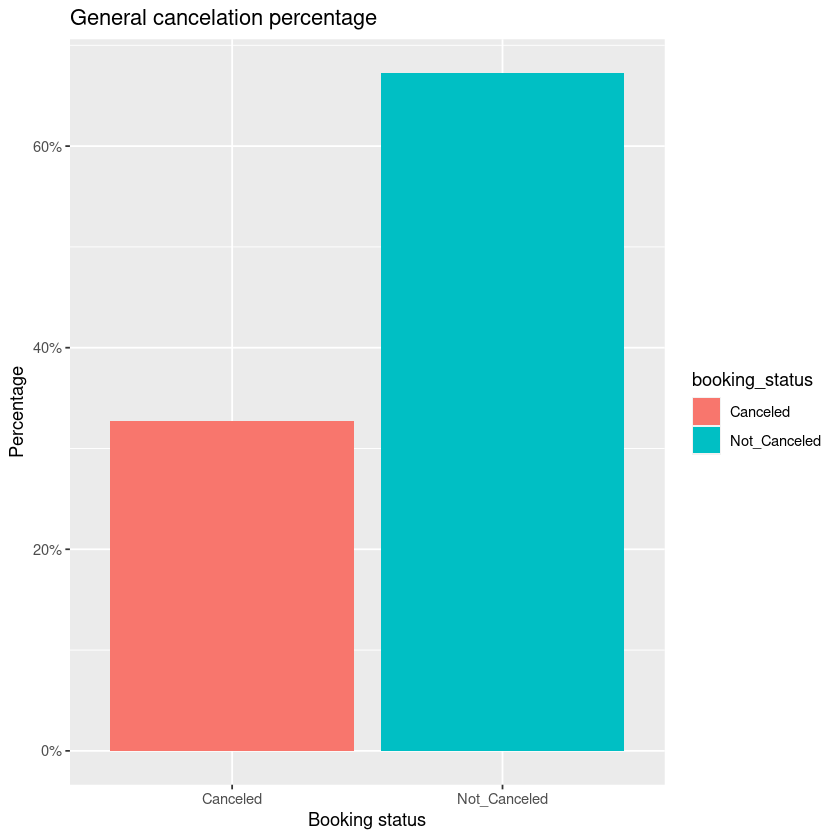

In [88]:
# Getting the general cancelation rate:
Cancel <- ht %>%  
    count(booking_status) %>%
	mutate(percentage = n/sum(n))

Cancel 

# Plotting the data general cancelation rate:
ggplot(Cancel, aes(x = booking_status, y = percentage)) + 
  geom_bar(stat = "identity", aes(fill = booking_status))  +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "General cancelation percentage",
       x = "Booking status", y = "Percentage")

## 2.2. Preparating first data for analysis:

* Since the columns "lead_time" and "avg_price_per_room" have various values, i'll be analyzing them separatelly.

2.2.1. Preparating the data with few variables:

In [89]:
# Creating a vector with the column names, execpt for the mentioned before:

b.data <- setdiff(names(ht), c('no_of_weekend_nights', 'lead_time', 'avg_price_per_room', 'booking_status'))

# Booking status is being removed, because it will be the one to be compared with the others (it doesn't make sense to compare it with itself)
# No of weekend nights will be used for answer the second question, "total nights will be used for general analysis"

# Creating a subseting function:

separ.v <- function(x){
	#1. Separating the segments:
	
	seg <- ht %>% 
	select((x), booking_status)
	seg <- table(seg)
	seg <- as.data.frame(seg)
	seg <- seg %>% 
	pivot_wider(names_from = booking_status, values_from = Freq, values_fill = 0)
	
	#2. Adding Cancel percentage:
	
	seg$cancel_percentage <- seg$Canceled / (seg$Canceled + seg$Not_Canceled)
	
	# Adding a column to see the representation of each category in the dataset:
	seg$rep_in_total_data <- (seg$Canceled + seg$Not_Canceled) / sum(seg$Canceled + seg$Not_Canceled) * 100
	
	#3. Viewing the table:
	seg
}

# Creating a list of datasets using the function:

b.data_compilation <- suppressWarnings(lapply(b.data, separ.v))


## 2.3. First data observations:

In [90]:
# Calling the dataset compilation list:

b.data_compilation

no_of_adults,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<int>,<int>,<dbl>,<dbl>
0,42,95,0.3065693,0.38201997
1,1833,5773,0.2409940,21.20907925
2,9015,16798,0.3492426,71.97869611
3,852,1438,0.3720524,6.38558920
4,3,13,0.1875000,0.04461547
no_of_children,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<int>,<int>,<dbl>,<dbl>
0,10781,22494,0.3239970,92.556535284
1,535,1070,0.3333333,4.464409891


* Insights on datasets:
1. No of adults:
1.1. The category 0 data will be dropped, the data doesn't seem natural and it's not representative enough (rep_in_total_data);

1.2. The 4 and 3 categories will be merged into one called 3+;

1.3. The table revels that single travelers have an absolute cancel percentage 10% lower.

2. No of children:
2.1. Most guests don't bring children, so in order to make it more representative this dataset will be separated by the presence of children in the booking (0, 1+).

3. Type of meal plan:
3.1.  Aside from the higher cancelation in the type 2, this dats don't really reveals that this have any influence at all in the cancelation rates, it doesn't seem productive to use this criteria to reduce the cancelation percentage;

3.2.  Although it is not the focus of the current project, i'll leave an oberservation that since 90% of the guests chose between plan 1 or no meal plan, a further analysis focusing on the impact of reviewing the offered options can reveal interesting insights for cost reduction.

4. Required car parking space:
4.1. The guests that require a parking space have a cancel rate 3 times lower, but they're in far minority;

4.2. Aside from that info, the data doesn't say any other thing to tell us, these data will not be considered into further analysis, but the information told will be considered at the final considerations and recommendations.

* Continues on next box...

5. Room type reserved:
5.1. Room types 5 to 7 are the only ones which have cancel rate notably different from the average, but these three are not representative;

5.2. Just like the meal plans, these types are concentrated into two options, an analysis over the types of room offered can also reveal good cost reduction insights (the changing of options have a much higher cost compared to the item 3).

6. Arrival month:
6.1. So far this is one of the most interesting classification, cause it reveals a higher variation in the relative cancel rate, adding the fact that we have a good distribution in the representativeness of each category (month).

7. Market segment type:
7.1. It's easily noticed that the Corporate segment have a cancel rate 3 times lower in comparison with others, stategies focusing on expanding in this market is a recommendation;

8. No of special requests:
8.1. This one is the easiest to notice the differences between categories, for future analysis the 2 to 5 will be merged into 2+.

9. Total Nights:
9.1. The category of 0 will be removed, because it doesn't seem to have value (impossible to stay for less than 1 night;

9.2. Single night guests have a cancelation rate about 12% lower than the rest of the representative data;

9.3. After 6 days, the individual categories are not representative, the cancelation rate seems higher than average, this category will be merged for better analysis.

In [91]:
# Making the appointed ajustments:

# Dropping non relevant datasets:

b.data_compilation <- b.data_compilation[-c(3:5)]

# Ajustments:
# Removing values:

# Removing the 0 value for the no_of_adults/total_nights:
b.data_compilation[[1]] <- b.data_compilation[[1]][-1, ]
b.data_compilation[[6]] <- b.data_compilation[[6]][-1, ]

# Removing Aviation and Complementary from market_segment_type:
b.data_compilation[[4]] <- b.data_compilation[[4]][-c(1, 2), ]


# Creating ajustment function:

ajustn1 <- function(data, y, x){ 
	# Creating a subset of the data to be merged (all of them match the condition "rep_in_total_data < 13"):
    sub_data <- subset(data, rep_in_total_data < x)

   # Creating the new line:
   new_row <- data.frame(t(apply(sub_data[, -1], 2, sum)))
   
	# Note: col1 was removed in this step, it will be added back on next step receiving the appropriate names:
	
   # Adding the factor type (col1 value):
   new_value <- y
   new_row <- cbind(new_value, new_row)
   colnames(new_row) <- names(data)

   # Adding the new line into the original dataset and removing the merged data:
   data <- rbind(data[!(data$rep_in_total_data < x), ], new_row)

   # Ajusting cancell percentage:
	data$cancel_percentage = data$Canceled / (data$Canceled + data$Not_Canceled)

	# Calling the result:
	data
}

In [92]:
# Applying the function:

# no_of_adults:
b.data_compilation[[1]] <- ajustn1(b.data_compilation[[1]], "3+", 7)

# no_of_children:
b.data_compilation[[2]] <- ajustn1(b.data_compilation[[2]], "1+", 7)

# no_of_special_requests:
b.data_compilation[[5]] <-ajustn1(b.data_compilation[[5]], "2+", 13)

# total_nights:
b.data_compilation[[6]] <- ajustn1(b.data_compilation[[6]], "6+", 7)

# Calling results:

b.data_compilation

no_of_adults,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1833,5773,0.2409940,21.209079
2,9015,16798,0.3492426,71.978696
3+,855,1451,0.3707719,6.430205
no_of_children,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,10781,22494,0.323997,92.556535
1+,997,1679,0.372571,7.443465
arrival_month,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<int>,<int>,<dbl>,<dbl>


## 2.4. First data visualization

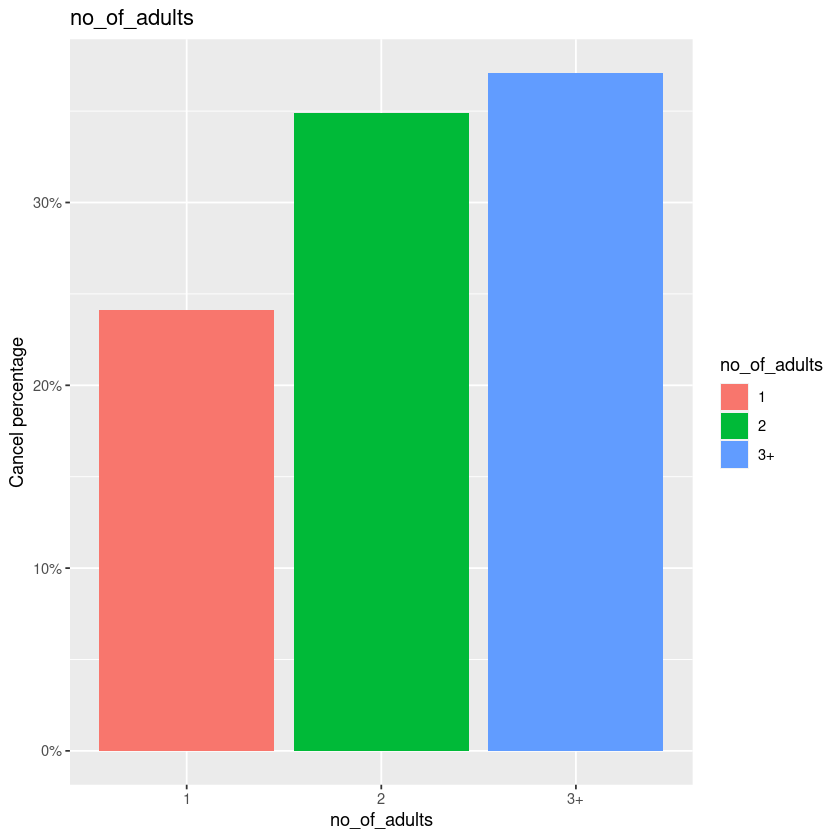

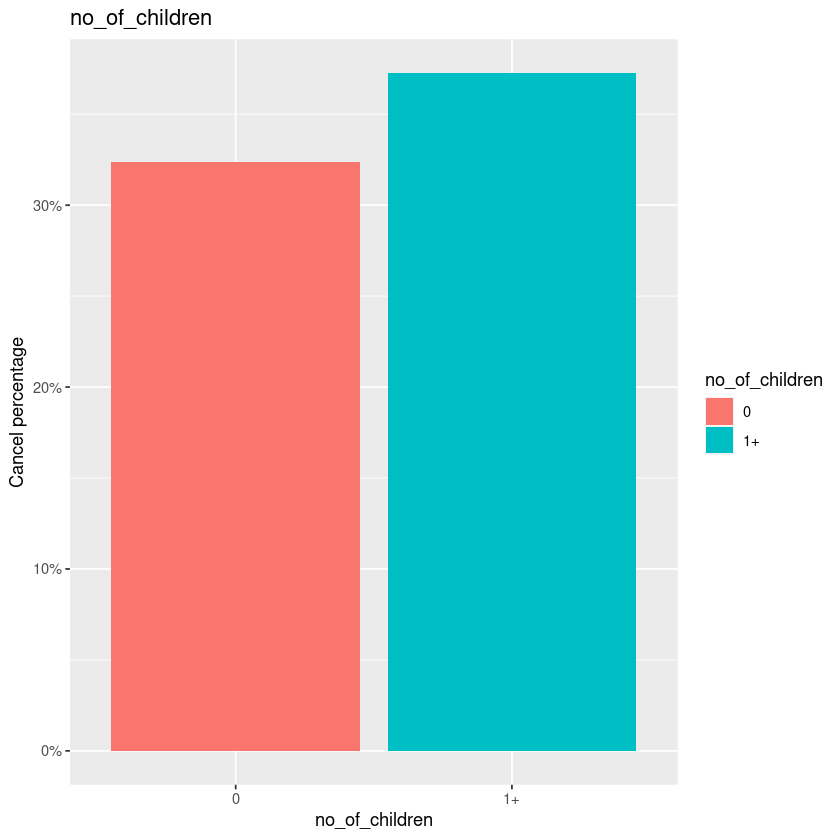

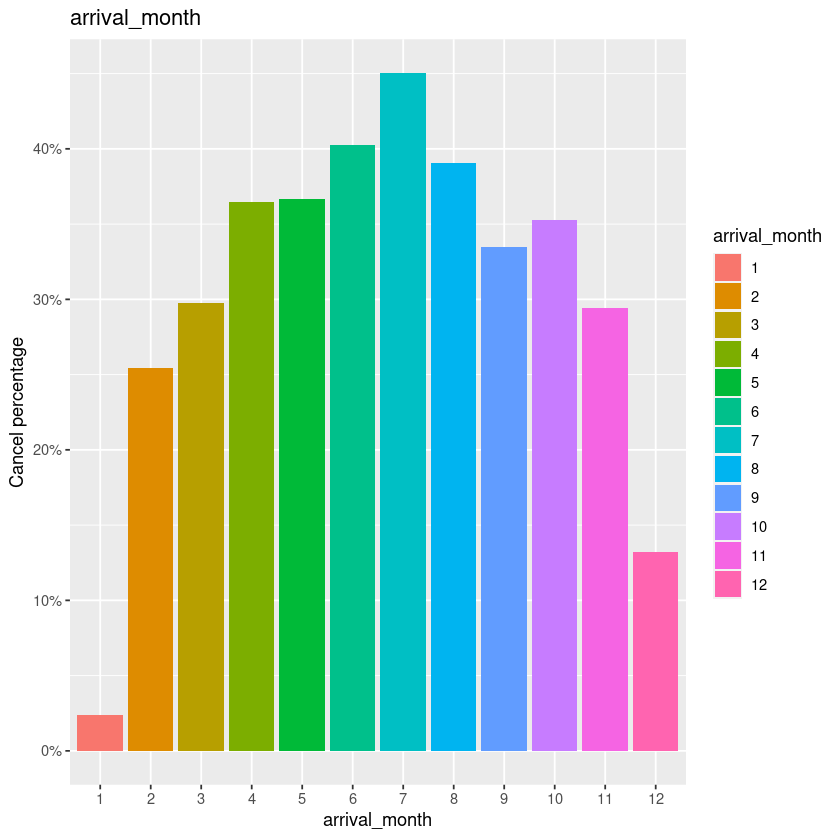

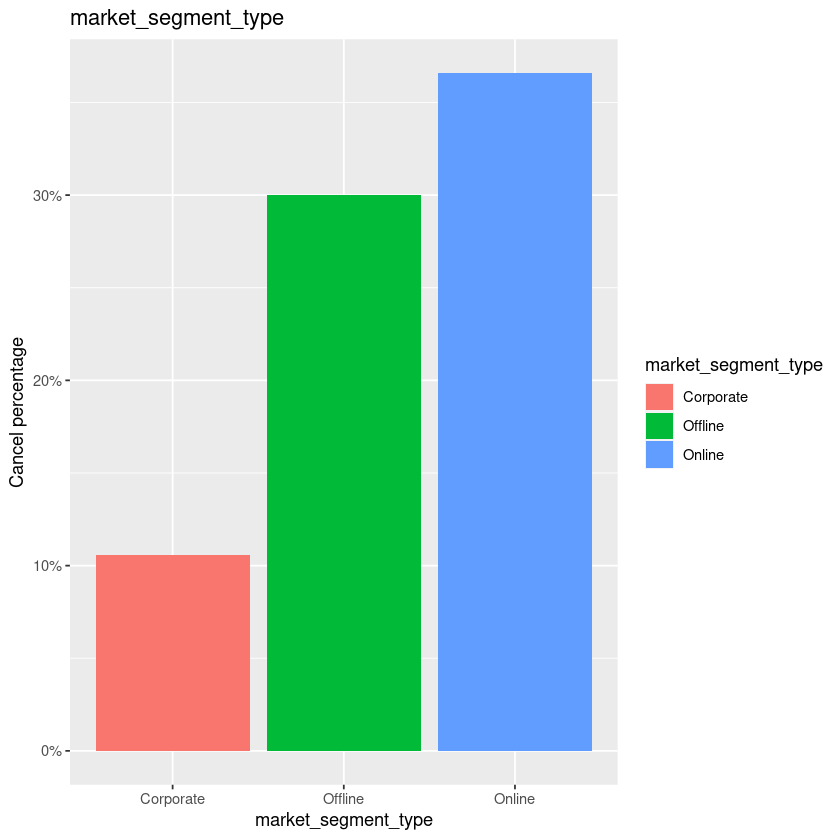

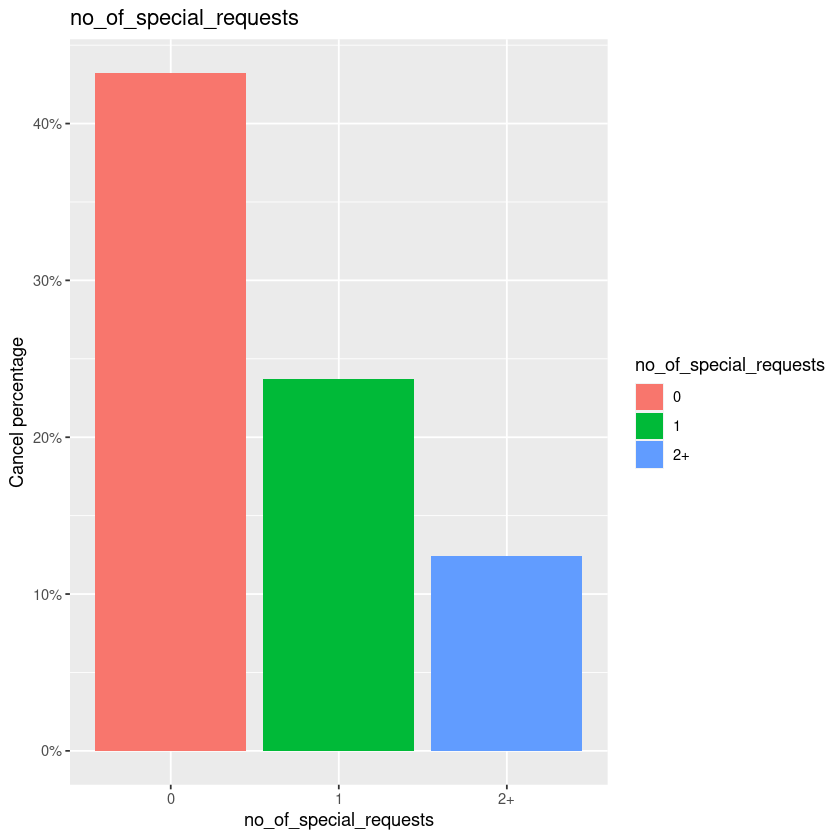

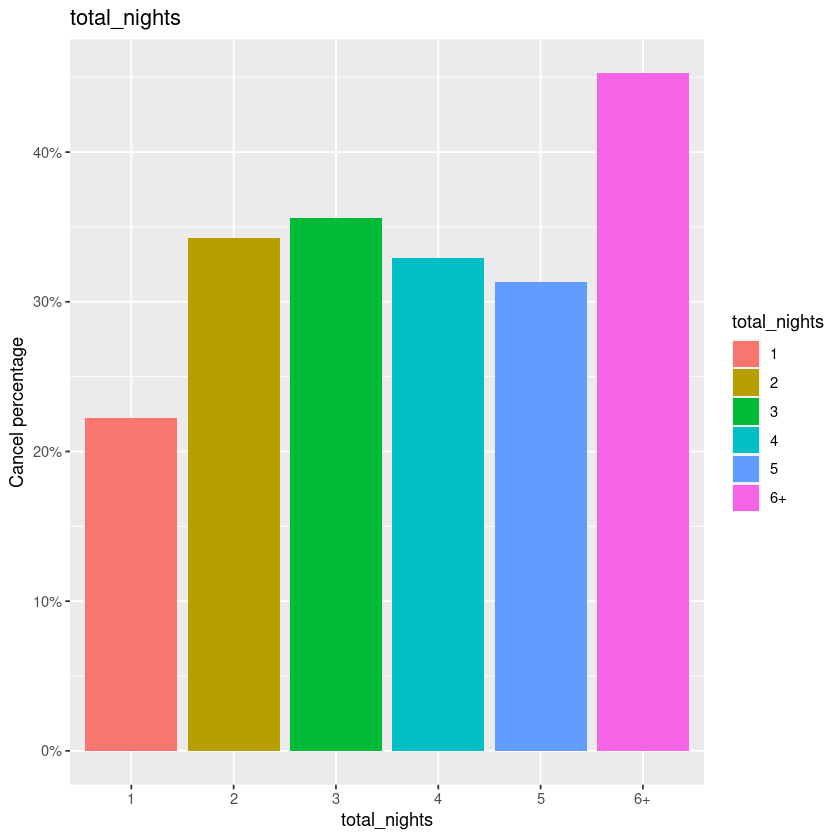

In [93]:
# Cancel rate vizualization:

for (data in b.data_compilation) {
  pl <- ggplot(data, aes(x = data[[1]] ,y = cancel_percentage)) + 
        geom_bar(stat = "identity", aes(fill = data[[1]]))  +
        scale_y_continuous(labels = scales::percent, name = "Cancel percentage")  +
        labs(title = names(data)[1],x = names(data)[1] , y = "Cancel percentage") +
        scale_fill_discrete(name = names(data)[1])
	    
	
	suppressWarnings(print(pl))
}

* Observations:
1. The presence of children doesn't seem to have a high impact on the cancel rate;
2. The arrival month seems an interesting parameter for the following analysis;
3. As suspected, after 5 nights, the cancelation tend to be much higher.

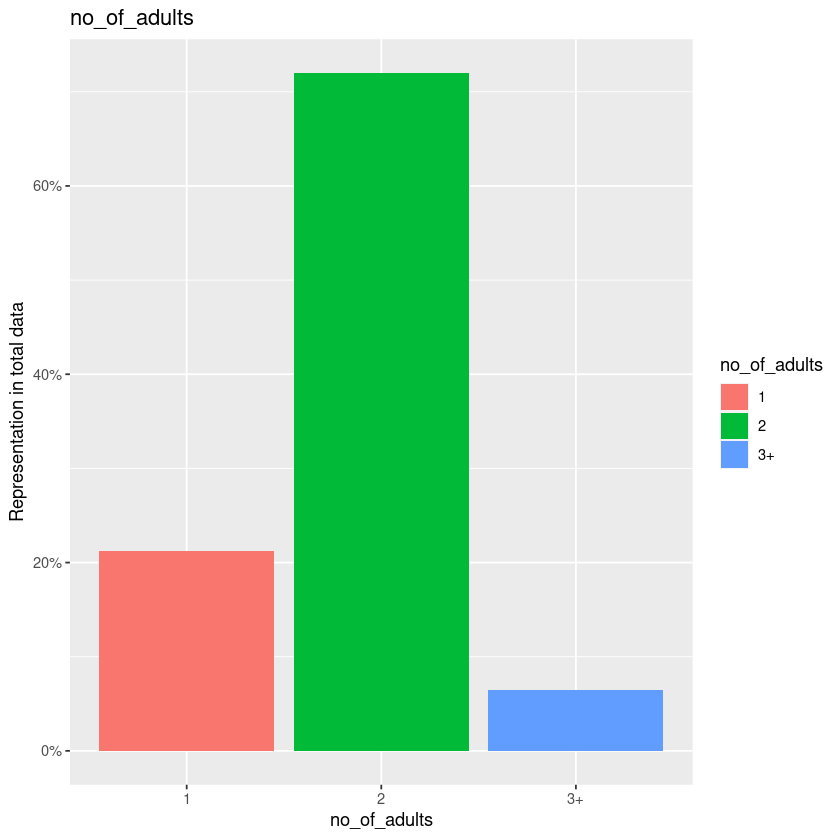

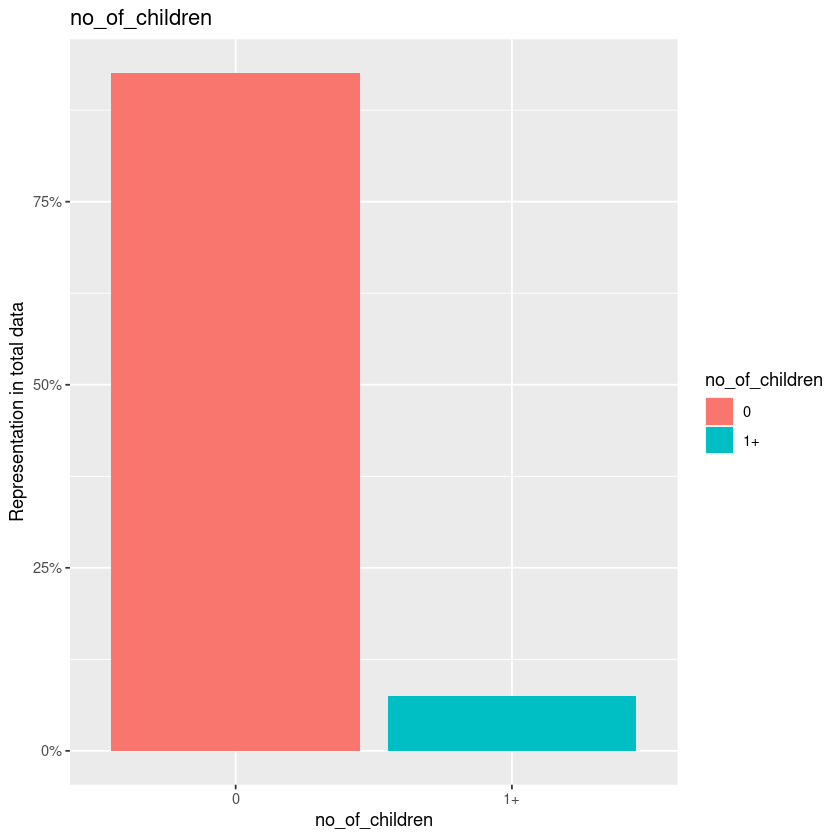

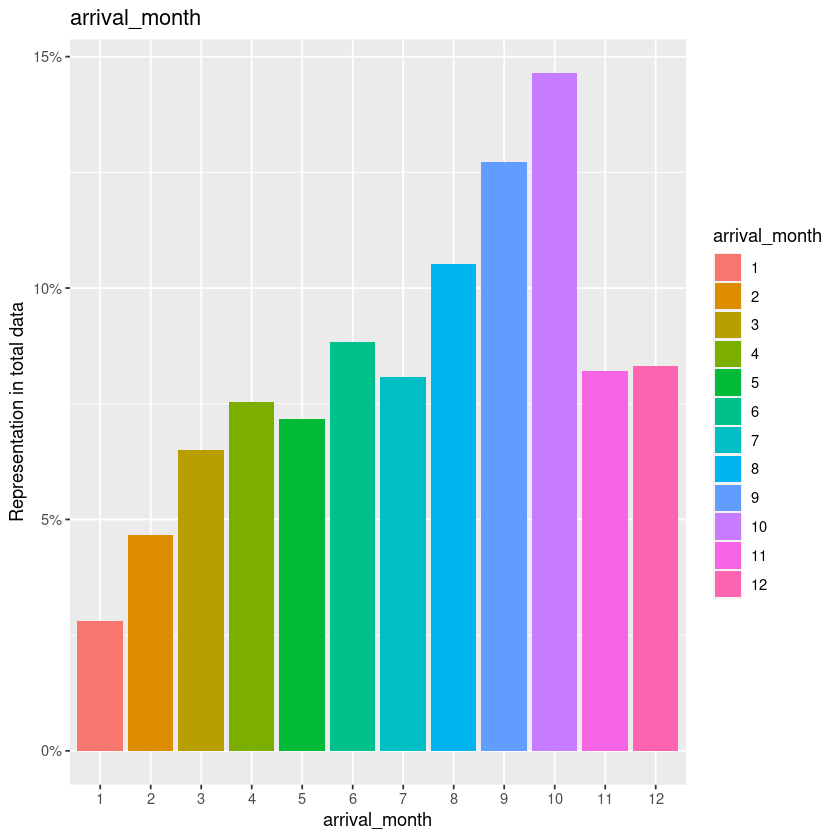

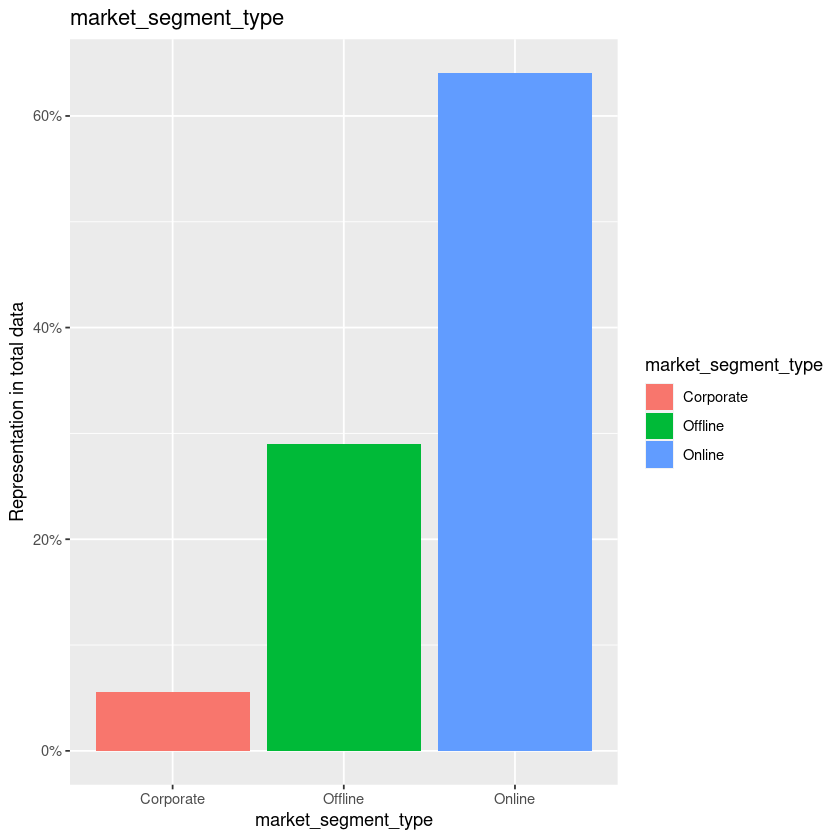

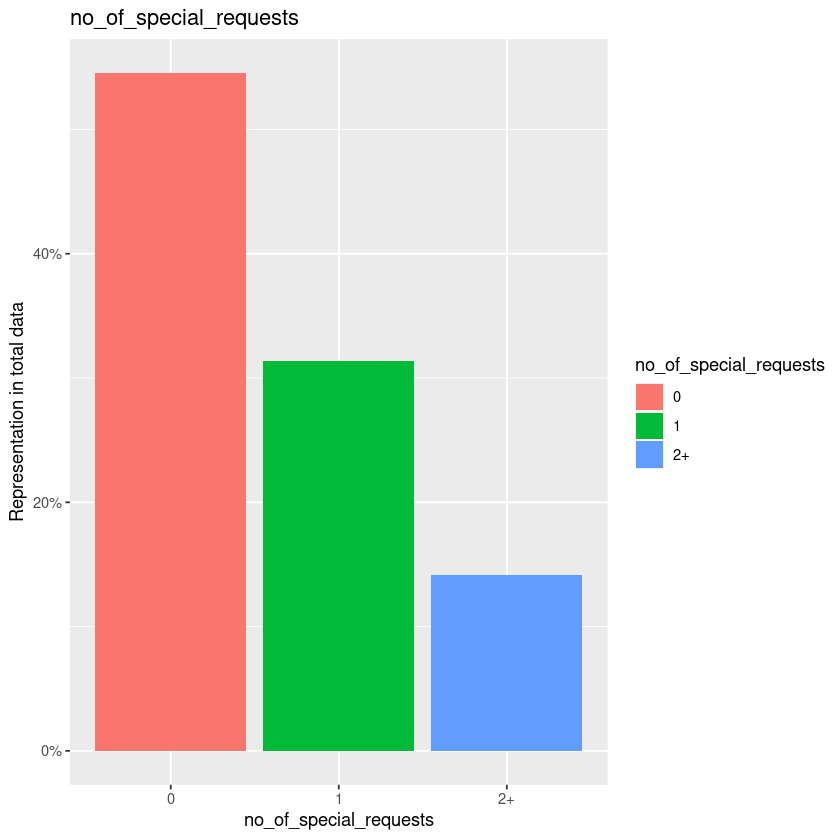

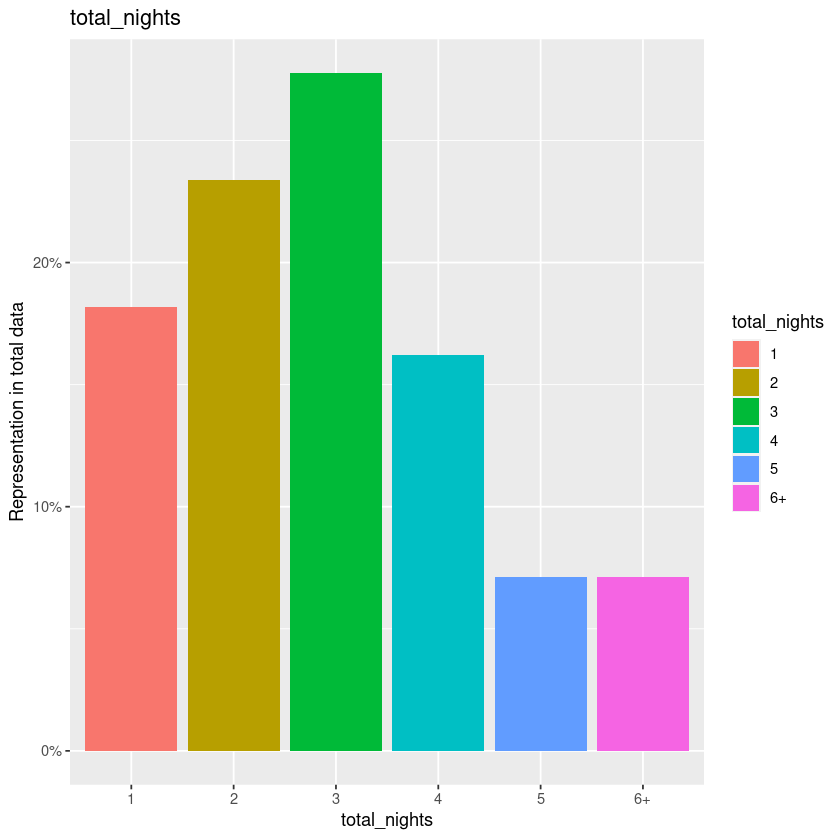

In [94]:
# Representation in total data vizualization:

for (data in b.data_compilation) {
  pl <- ggplot(data, aes(x = data[[1]] ,y = rep_in_total_data/100)) + 
        geom_bar(stat = "identity", aes(fill = data[[1]]))  +
        scale_y_continuous(labels = scales::percent, name = "Representation in total data")  +
        labs(title = names(data)[1],x = names(data)[1] , y = "Representation in total data") +
        scale_fill_discrete(name = names(data)[1])
	    
	
	suppressWarnings(print(pl))
}

## 2.5. Checking lead time and total price:

Warning message:
“Removed 926 rows containing missing values (`geom_point()`).”


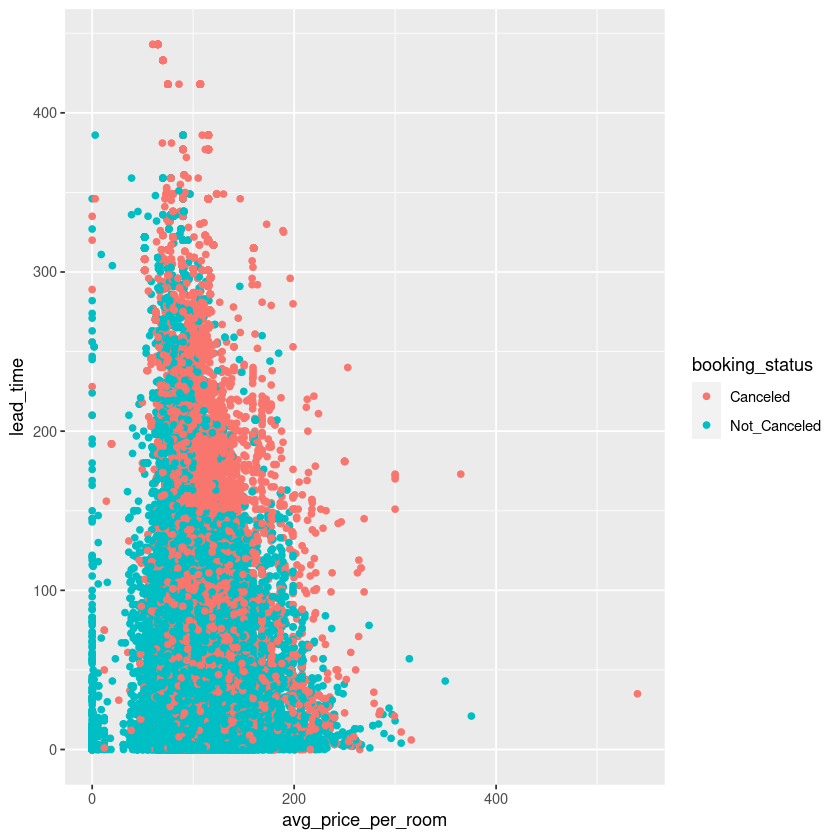

In [95]:
# Creating the subset with the desired data:
sub_2 <- ht %>%
  select(lead_time,
		avg_price_per_room,
		booking_status)

# Visualizing the data:
  ggplot(data = sub_2) + 
  geom_point(mapping = aes(x = avg_price_per_room, y = lead_time, color = booking_status))

* First impressions:
1. The average price doesn't seem to have great influence in the cancel rate, therefore, it will be dropped from the subset;
2. The lead time appears to have relevant impact in the cancel rate(the number of cancelled bookings starts to increase greatly from values higer than 150 days),to proceed the analysis, i'll group the leading time into categories for better understanding it.

In [96]:
# Shaping the desired data:

sub_2 <- separ.v("lead_time")
sub_2

lead_time,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<fct>,<int>,<int>,<dbl>,<dbl>
0,67,1210,0.05246672,3.5667402
1,109,959,0.10205993,2.9829903
2,37,594,0.05863708,1.7624221
3,55,567,0.08842444,1.7372846
4,61,559,0.09838710,1.7316985
5,75,499,0.13066202,1.6032176
6,54,463,0.10444874,1.4440131
7,47,374,0.11163895,1.1758791
8,53,380,0.12240185,1.2093959


In [97]:
# Removing lead time = 0
sub_2 <- filter(sub_2, lead_time != 0)

# Converting lead_time to numeric:
sub_2 <- filter(sub_2, lead_time != 0)
sub_2$lead_time <- as.numeric(sub_2$lead_time)

# Getting the categories:
sub_2 <- sub_2 %>%
  mutate(lead_time = case_when(
    lead_time >= 1 & lead_time <= 7 ~ "01 Week -",
    lead_time > 7 & lead_time <= 14 ~ "02 Week -",
	lead_time > 14 & lead_time <= 30 ~ "1 Month -",
	lead_time > 30 & lead_time <= 60 ~ "2 Month -",
	lead_time > 60 & lead_time <= 90 ~ "3 Month -",
	lead_time > 90 & lead_time <= 120 ~ "4 Month -",
	lead_time > 120 & lead_time <= 150 ~ "5 Month -",
	lead_time > 150 ~ "5 Month+" )) %>%
  group_by(lead_time) %>%
  summarize_all(sum)

# Correcting the cancel percentage:

sub_2$cancel_percentage <- sub_2$Canceled / (sub_2$Canceled + sub_2$Not_Canceled)

# Viewing result:
sub_2

lead_time,Canceled,Not_Canceled,cancel_percentage,rep_in_total_data
<chr>,<int>,<int>,<dbl>,<dbl>
01 Week -,391,3641,0.09697421,11.261626
02 Week -,398,2199,0.15325375,7.253582
1 Month -,828,3270,0.20204978,11.445968
2 Month -,1447,4834,0.23037733,17.543223
3 Month -,1272,3264,0.28042328,12.669329
4 Month -,1374,2101,0.39539568,9.705891
5 Month -,773,1428,0.35120400,6.147530
5 Month+,5170,2136,0.70763756,20.406111


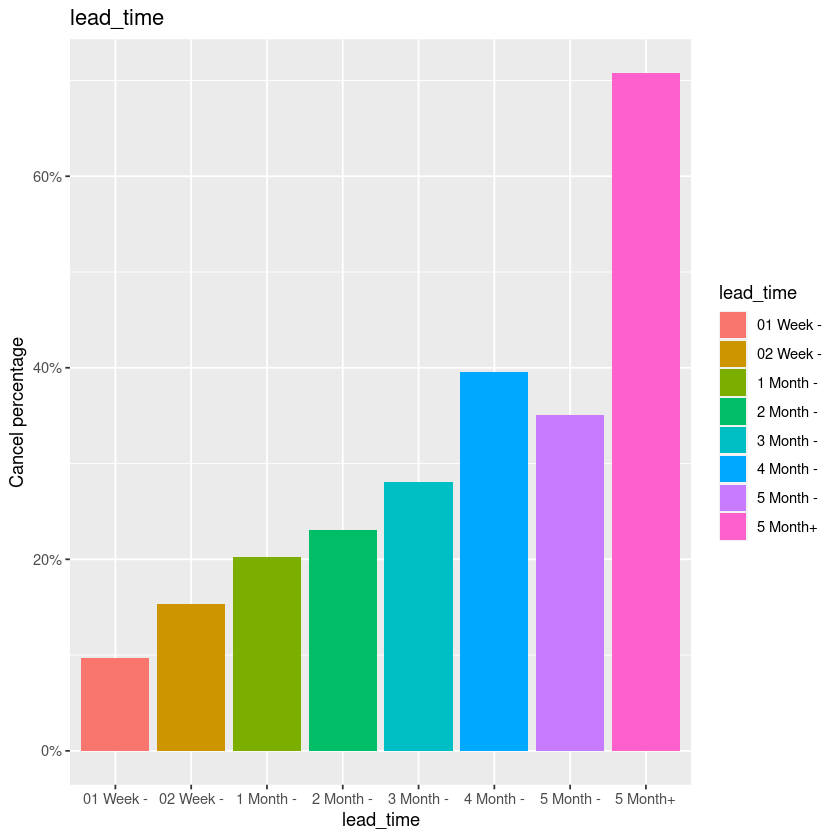

In [98]:
# Visualizing data:
pl_lt <- ggplot(sub_2, aes(x = sub_2[[1]] ,y = cancel_percentage)) + 
        geom_bar(stat = "identity", aes(fill = sub_2[[1]]))  +
        scale_y_continuous(labels = scales::percent, name = "Cancel percentage")  +
        labs(title = names(sub_2)[1],x = names(sub_2)[1] , y = "Cancel percentage") +
        scale_fill_discrete(name = names(sub_2)[1])
	    
	
	suppressWarnings(print(pl_lt))

* The lead time is by far the highest predictor of cancelation, we can see the cancel rare increasing as the lead time increase;
* Here we end the general analysis of the data, i'll proceed to answer the second question before finish the analysis and give general advices.

# 3. Answering question 2: ("Are cancellations more likely during weekends?")

In [99]:
# Creating a subset with the relevant data and checking it:
weekend <- ht %>%  
    select(no_of_weekend_nights, booking_status) 


head(weekend)
dim(weekend)


no_of_weekend_nights,booking_status
<dbl>,<chr>
NA,Not_Canceled
2,Not_Canceled
2,Canceled
0,Canceled
1,Canceled
0,Canceled


[1] 36275     2

In [100]:
# Creating a function:
check.cancel <- function(x){

	# 1. Separating weekend night reservations:

	cancel_weekend <- x %>%
  	filter(no_of_weekend_nights != 0) %>%
  	count(booking_status)

	cancel_n_weekend <- x %>%
  	filter(no_of_weekend_nights == 0) %>%
  	count(booking_status)

	# 2. Adding the percentage of cancelled bookings for each group:
	cancel_weekend$cancel.percentage <- cancel_weekend$n / sum(cancel_weekend$n)
	cancel_n_weekend$cancel.percentage <- cancel_n_weekend$n / sum(cancel_n_weekend$n)

	# 3. Vizualizing the data:
	Cancel_Percentage <- rbind(cancel_weekend[1, 3], cancel_n_weekend[1, 3])
	percent <- data.frame(
	Weekend_reservation = c("YES", "NO"),
	Cancel_Percentage = Cancel_Percentage)
	
	View(percent)

	ggplot(percent, aes(x = Weekend_reservation, y = cancel.percentage)) + 
  	geom_bar(stat = "identity", aes(fill = Weekend_reservation))  +
  	scale_y_continuous(labels = scales::percent) +
  	labs(title = "Cancelation percentage comparison",
    	   x = "Weekend reservation", y = "Percentage")
	}

Weekend_reservation,cancel.percentage
<chr>,<dbl>
YES,0.3507008
NO,0.3018247


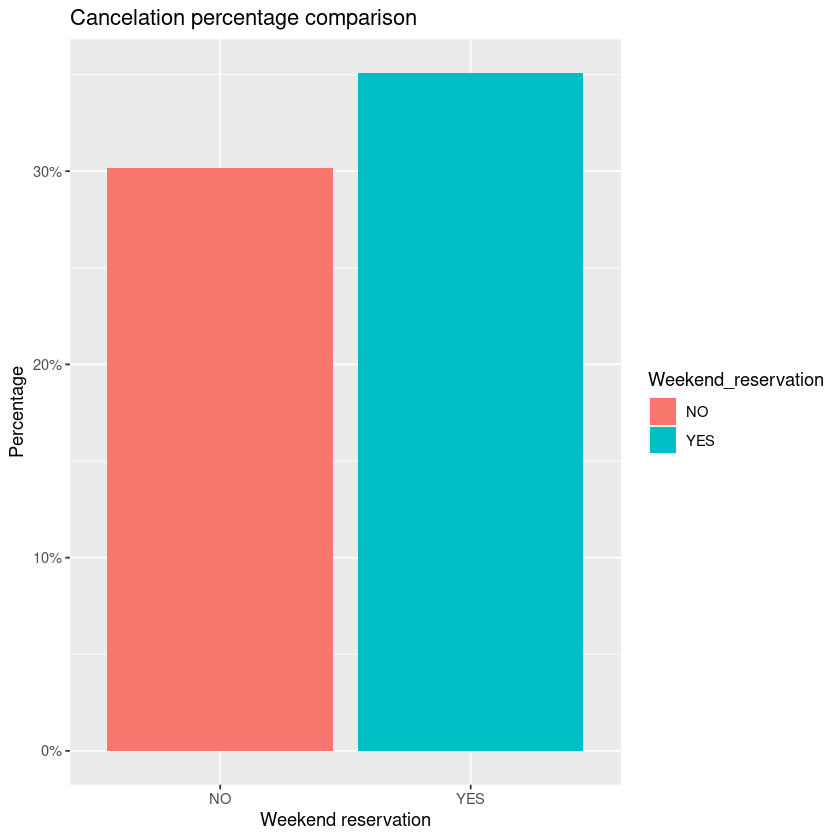

In [101]:
# 3. Applying the function for a general segment:

check.cancel(weekend)

* According to the data, the cancelations on weekends are, in general, about 5% higher. In general terms, it doesn't seem to have great relevance in booking cancelation.

# 4. Final considerations and general advices:

## 4.1. Relevant prediction variables and advices:
* Here i'll leave the a note about the most relevant variables in the analysis, finishing with general advices.

4.1.1. Lead time: The lead time is by far the best predictor variable, the cancel rate increases with the lead time. Advices:
* Precification method that favors reservations more close to the arrival date;
* Reviewing refund policy. Introducing a cancelation fee that gets higher when the arrival date gets closer (it may not be applicable deppeding on the laws or values of the company*);
* Having no reservation option between four or five months before the arival date (the exception can be in the corporate segment where the cancell rate is far lower), although it may sound extreme, i think this particular advice is worth trying.

4.1.2. Special requests: The presence of special requests have great influence on the cancel rate. Advices:
* Offer the most common special requests in the moment the potencial guest is booking;
* Have a discount for cumulative special requests (it may vary according to the request).

4.1.3. Arrival month: The cancel rate have a great variation throughout the year. Advices:
* Precification method lowering the prices on low cancel months;
* Cancelation fees in higher cancel rate months. *

4.1.4. Market segment type: The Corporate segment have much lower cancel rates. Advice:
* Focus on increasing the Corporate segment.



## 4.2. Other observations:

* Total nights/No of adults: Single night users (and single adults) have lower cancel rates, the cancel rate is higher after 6 days. For this particular variable I could not think of an useful advice, but I think it's interesting for the client to know how the influence of this variable.

* Guests that require parking have much lower cancel rates, it may be worth checking the costs of increasing the parking spaces.

* Although it's not related to the cancell rates, the meal plan and room type choosed are concentrated in some options, a posterior analysis on this two factors may be interesting.